### 판다스 내장 그래프 도구
* 판다스는 Matplotlib 라이브러리의 기능을 일부 내장하고 있어서 별도로 임포드하지 않고 간단히 그래프 그릴 수 있음.
* 선그래프 : df.plot()메소드 적용시 다른 옵션을 추가하지 않으면 가장 기본적인 선 그래프를 그림.
* 막대 그래프 : df.plot(kind='bar'), df.plot(kind='barh',stacked=True,alpha=0.8)
* 히스토그램 : df.plot(kind='hist')
* 산점도 : df.plot(x=' ', y=' ', kind='scatter'), 상관관계를 볼 수 있음.
* 박스 플롯 : df.plot(kind='box'), df.boxplot(column=['feature']) 특정 변수의 데이터 분포와 분산 정도에 대한 정보를 제공.

## matplotlib
- histogram : plt.hist(x, bins= )
- line plot : plt.plot(x,y)
- plt.bar(x,y, width= , color='')
- scatter plot : plt.scatter(x, y):

## seaborn
- sns.distplot(data, bins=, color=, kde=), histplot, displot으로 변경
- sns.boxplot(x, y, data, color)
- sns.violinplot(x, y, data, color)
- sns.barplot(x, y, data, color)
- sns.jointplot(x, y, data, color)
- sns.pairplot(data, hue, palette)
- sns.lmplot(x,y,data,color)
- sns.regplot(x,y,data,fig_reg=False)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/kdt_231026/m3_분석라이브러리/visualization/dataset/주가데이터.csv')
df.head()

,Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    20 non-null     object
 1   Close   20 non-null     int64 
 2   Start   20 non-null     int64 
 3   High    20 non-null     int64 
 4   Low     20 non-null     int64 
 5   Volume  20 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.1+ KB


In [4]:
# Q. NDate 칼럼을 datetime 타입으로 생성하고 인덱스로 셋팅하세요.
# 컬럼 선택 : 'Close' 'Start' 'High' 'Low'
df['NDate'] = pd.to_datetime(df.Date)
df1 = df.set_index('NDate')
df1.drop(['Date','Volume'],axis=1,inplace=True)
df1.head()

,Close,Start,High,Low
NDate,,,,
2018-07-02,10100,10850,10900,10000
2018-06-29,10700,10550,10900,9990
2018-06-28,10400,10900,10950,10150
2018-06-27,10900,10800,11050,10500
2018-06-26,10800,10900,11000,10700


<Axes: xlabel='NDate'>

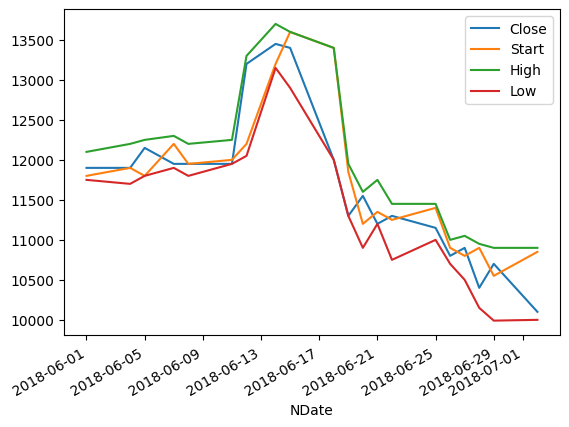

In [5]:
# 선 그래프
df1.plot()

<Axes: xlabel='NDate'>

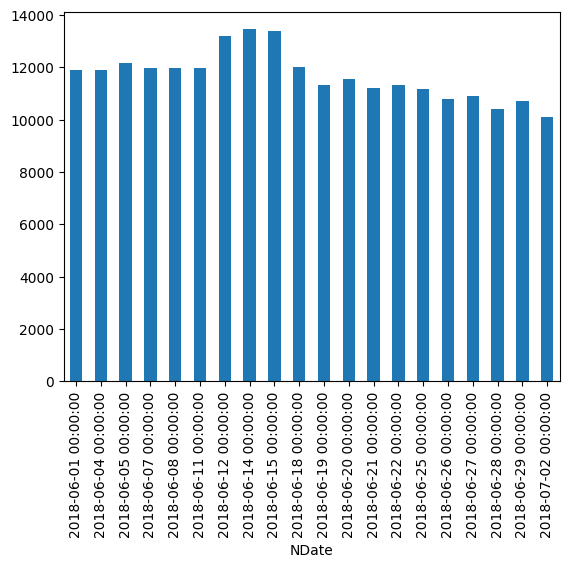

In [6]:
# 막대 그래프
df1.Close[::-1].plot(kind='bar')

<Axes: xlabel='NDate'>

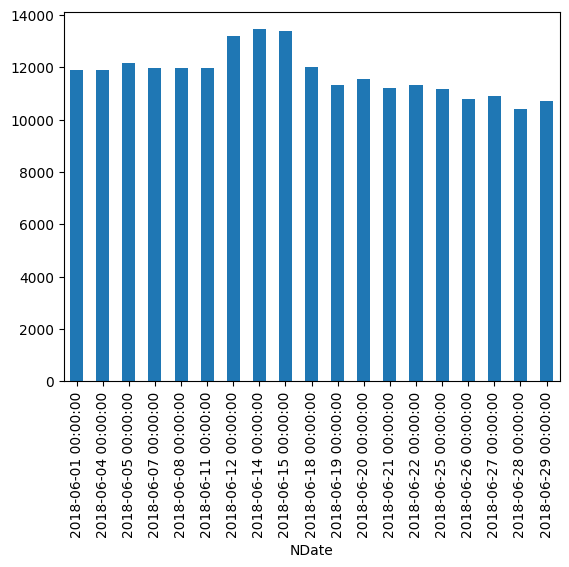

In [7]:
# Q. 6월만을 추출하여 Close 칼럼으로 일별 막대 그래프를 표현하세요
df1.loc['2018-6','Close'][::-1].plot(kind='bar')

In [8]:
df1.Close.value_counts()

11950    3
11300    2
11900    2
10100    1
10700    1
10400    1
10900    1
10800    1
11150    1
11200    1
11550    1
12000    1
13400    1
13450    1
13200    1
12150    1
Name: Close, dtype: int64

<Axes: ylabel='Frequency'>

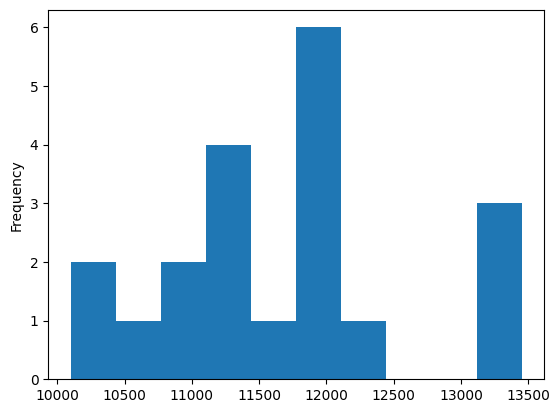

In [9]:
df1.Close.plot(kind='hist',bins=10)

<Axes: ylabel='Frequency'>

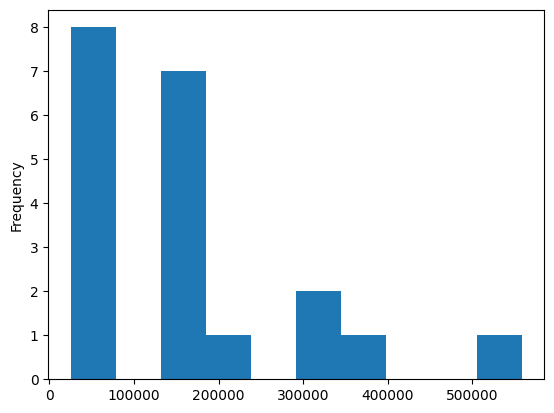

In [10]:
# Q. df에서 Volume 칼럼의 분포를 탐색하는 히스토그램을 표현하세요.
df.Volume.plot(kind='hist')

<Axes: xlabel='Close', ylabel='Volume'>

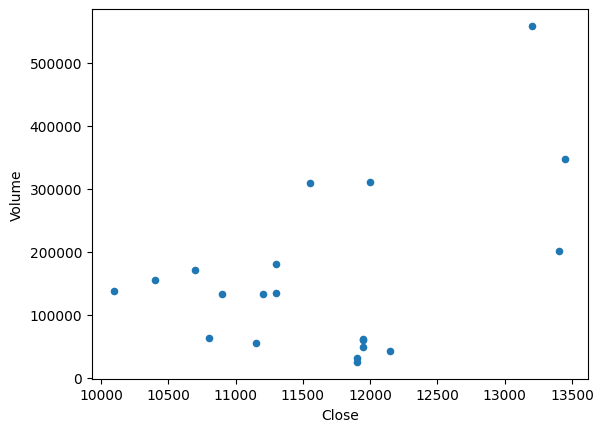

In [11]:
# Q. Close 칼럼과 Volume 칼럼으로 산점도를 표현하세요.
df.plot(x='Close',y='Volume',kind='scatter')

In [12]:
df.corr()

<ipython-input-12-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Close,Start,High,Low,Volume
Close,1.000000,0.856181,0.941201,0.946297,0.441466
Start,0.856181,1.000000,0.961009,0.921467,0.337829
High,0.941201,0.961009,1.000000,0.945487,0.484145
Low,0.946297,0.921467,0.945487,1.000000,0.246323
Volume,0.441466,0.337829,0.484145,0.246323,1.000000


<Axes: >

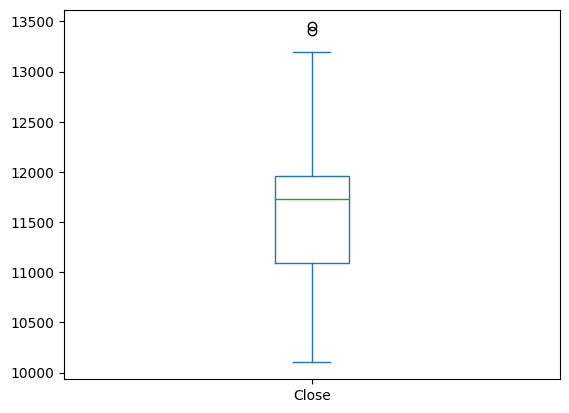

In [13]:
# Q. Close 칼럼의 Box Plot을 표현하세요.
df.Close.plot(kind='box')

In [14]:
df.Close.describe()

count       20.000000
mean     11662.500000
std        927.060294
min      10100.000000
25%      11087.500000
50%      11725.000000
75%      11962.500000
max      13450.000000
Name: Close, dtype: float64

#### Box plot 의미 해석

* IQR(Inter Quartile Range): 제 3사분위수 - 제1사분위수
* lower whisker: Q1 - 1.5 x IQR 이내인 값중에서 최솟값
* upper whisker: Q3 + 1.5 x IQR 이내인 값중에서 최댓값
* 이상치: lower whisker, upper whisker를 벗어나는 값

In [15]:
iqr = 11962.500000 - 11087.500000
uw_check = 11962.500000 + iqr*1.5
print(uw_check,'\n')
c = df.Close.sort_values(ascending=False)
print(c[:5],'\n')
df.Close[df.Close >= uw_check]

13275.0 

12    13450
11    13400
13    13200
17    12150
10    12000
Name: Close, dtype: int64 



11    13400
12    13450
Name: Close, dtype: int64

In [16]:
# Q. Close 칼럼의 이상치를 구하세요.
Q1 = df.Close.describe()['25%']
Q3 = df.Close.describe()['75%']
IQR = Q3 - Q1
outlier = []
for i in df.Close:
    if not Q1 - IQR*1.5 < i < Q3 + IQR*1.5:
        outlier.append(i)
print(outlier)

[13400, 13450]


In [17]:
Q1 = df.Close.describe()['25%']
Q3 = df.Close.describe()['75%']
IQR = Q3 - Q1
abv = df[(df['Close']<=(Q1-IQR*1.5))|(df['Close']>=(Q3+IQR*1.5))]
abv

,Date,Close,Start,High,Low,Volume,NDate
11,2018-06-15,13400,13600,13600,12900,201376,2018-06-15
12,2018-06-14,13450,13200,13700,13150,347451,2018-06-14


In [ ]:
# 과제
# Q. Start 칼럼의 분포 및 이상치 여부를 탐색하는 Box Plot 및 이상치를 구하세요.

In [ ]:
# [과제]
# Q. df_auto의 각 칼럼을 시각화해서 탐색한 후 인사이트를 기술하세요.(5개 이상)

In [21]:
import pandas as pd
df_auto = pd.read_excel('/content/drive/MyDrive/kdt_231026/m3_분석라이브러리/visualization/dataset/auto-mpg.xlsx')
df_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [22]:
df_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [23]:
df_auto.horsepower.unique()

array([130, 165, 150, 140, 198, 220, 215, 225, 190, 170, 160, 95, 97, 85,
       88, 46, 87, 90, 113, 200, 210, 193, '?', 100, 105, 175, 153, 180,
       110, 72, 86, 70, 76, 65, 69, 60, 80, 54, 208, 155, 112, 92, 145,
       137, 158, 167, 94, 107, 230, 49, 75, 91, 122, 67, 83, 78, 52, 61,
       93, 148, 129, 96, 71, 98, 115, 53, 81, 79, 120, 152, 102, 108, 68,
       58, 149, 89, 63, 48, 66, 139, 103, 125, 133, 138, 135, 142, 77, 62,
       132, 84, 64, 74, 116, 82], dtype=object)

In [24]:
import numpy as np
df_auto.horsepower.replace('?',np.nan, inplace=True)
df_auto.horsepower.fillna(df_auto.horsepower.mean(), inplace=True)
df_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [ ]:
# [과제]
# Q. mpg 컬럼의 이상치를 구하세요.

In [25]:
# mpg 컬럼의 이상치
q3 = df_auto.mpg.describe()['75%']
q1 = df_auto.mpg.describe()['25%']
iqr = q3 - q1
uw_check = q3 + 1.5 * iqr
print(uw_check,'\n')
m = df_auto.mpg.sort_values(ascending=False)
print(m[:5],'\n')
df_auto.mpg[df_auto.mpg >= uw_check]

46.25 

322    46.6
329    44.6
325    44.3
394    44.0
326    43.4
Name: mpg, dtype: float64 



322    46.6
Name: mpg, dtype: float64

In [26]:
df_auto[df_auto.mpg >= uw_check]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
322,46.6,4,86.0,65.0,2110,17.9,80,3,mazda glc


In [27]:
import pandas as pd
fish_multi = pd.read_csv('/content/drive/MyDrive/kdt_231026/m3_분석라이브러리/visualization/dataset/4_fm2.csv')
fish_multi.head()

,species,length
0,A,2
1,A,3
2,A,3
3,A,4
4,A,4


<Axes: xlabel='species', ylabel='length'>

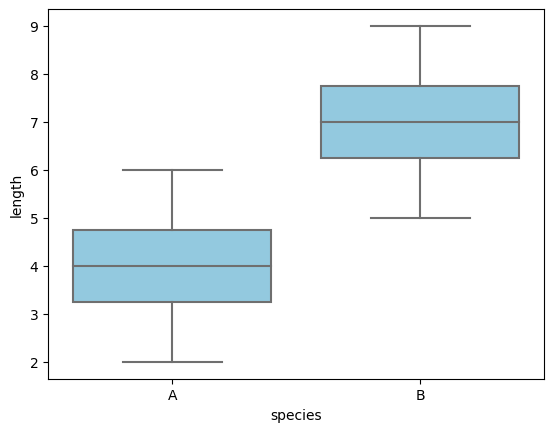

In [28]:
# fish_multi.groupby('species').plot(kind='box')
import seaborn as sns
sns.boxplot(x='species',y='length',data=fish_multi,color='skyblue')

In [29]:
fish_multi.groupby('species').describe()

length                                          
         count mean       std  min   25%  50%   75%  max
species                                                 
A         10.0  4.0  1.154701  2.0  3.25  4.0  4.75  6.0
B         10.0  7.0  1.154701  5.0  6.25  7.0  7.75  9.0

In [30]:
fish_multi.iloc[5,1] = 10
fish_multi.iloc[10,1] = 2
fish_multi.groupby('species').describe()

length                                           
         count mean       std  min   25%  50%   75%   max
species                                                  
A         10.0  4.6  2.221111  2.0  3.25  4.0  5.00  10.0
B         10.0  6.7  1.888562  2.0  6.25  7.0  7.75   9.0

In [ ]:
# 과제
# Q. A, B 그룹의 Box Plot을 그리고 이상치를 구하세요.

In [31]:
# 0부터 1000사이의 균일분포를 이루는 난수 생성
data = np.random.rand(10000)*1000
data[:10]
df = pd.DataFrame(data,columns=['Num'])
print(df.head())
df.describe()

          Num
0  228.224275
1   36.873248
2  748.451380
3  565.722739
4  873.773889


,Num
count,10000.000000
mean,501.457411
std,289.882697
min,0.022008
25%,252.655900
50%,502.486637
75%,751.861505
max,999.964037


<Axes: ylabel='Frequency'>

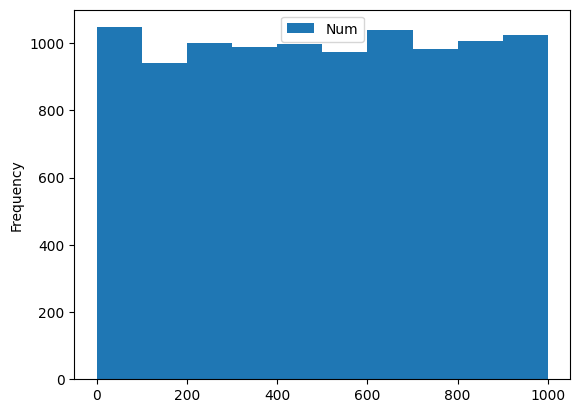

In [32]:
df.plot(kind='hist')

        Num
0  1.651243
1  0.414842
2  1.152843
3 -0.660687
4 -0.706015
                  Num
count  1000000.000000
mean         0.000826
std          0.999834
min         -4.834865
25%         -0.673144
50%          0.001355
75%          0.673886
max          4.666331
Axes(0.125,0.11;0.775x0.77)


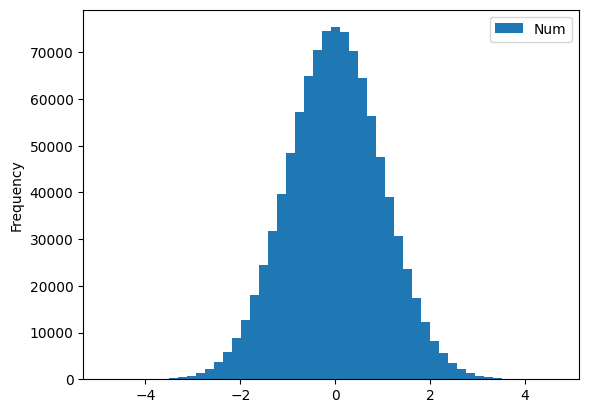

In [33]:
# Q. 평균 0, 표준편차 1인 표준정규분포 난수 10000개로 데이터프레임 생성,
# 통계요약표 및 시각화를 수행하세요(컬럼명 'Num')
data = np.random.randn(1000000)
df = pd.DataFrame(data, columns=['Num'])
print(df.head())
print(df.describe())
print(df.plot(kind='hist',bins=50))

         Num
0  13.248691
1   8.776487
2   8.943656
3   7.854063
4  11.730815
                Num
count  10000.000000
mean      10.019545
std        1.997672
min        2.687120
25%        8.674150
50%       10.016908
75%       11.343618
max       18.053698


<Axes: ylabel='Frequency'>

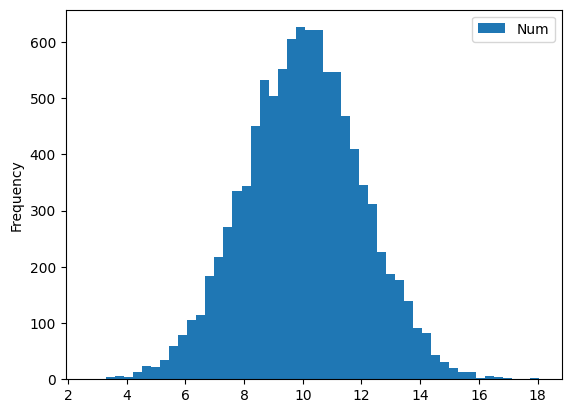

In [34]:
from scipy import stats
np.random.seed(1)
sample1 = stats.norm.rvs(loc=10,scale=2,size=10000) # 평균 10, 표준편차 2, 샘플 10000
df1 = pd.DataFrame(sample1, columns=['Num'])
print(df1.head())
print(df1.describe())
df1.plot(kind='hist',bins=50)

<Axes: >

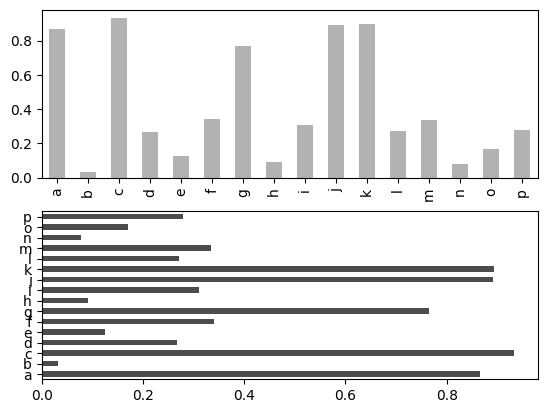

In [35]:
import matplotlib.pyplot as plt

fig,axes = plt.subplots(2,1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0],color='k',alpha=0.3)
data.plot.barh(ax=axes[1],color='k',alpha=0.7)

In [36]:
df = pd.DataFrame(np.random.rand(6,4),
                 index = ['one','two','three','four','five','six'],
                 columns = ['A','B','C','D'])
print(df)

              A         B         C         D
one    0.314396  0.789679  0.982823  0.394681
two    0.787791  0.204297  0.848268  0.705182
three  0.919122  0.169110  0.929848  0.150823
four   0.135593  0.995470  0.842857  0.680344
five   0.843496  0.041681  0.404026  0.581456
six    0.670009  0.621954  0.871499  0.552468


<Axes: >

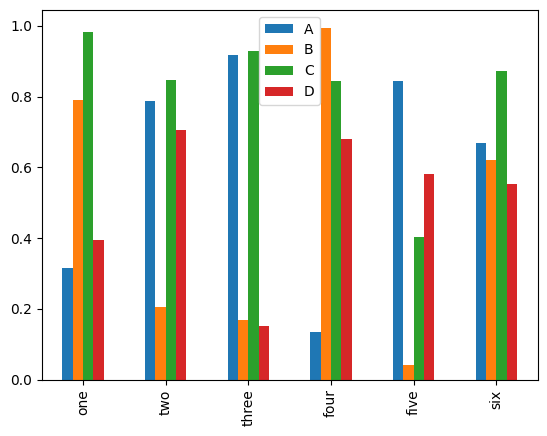

In [37]:
df.plot(kind='bar')

<Axes: >

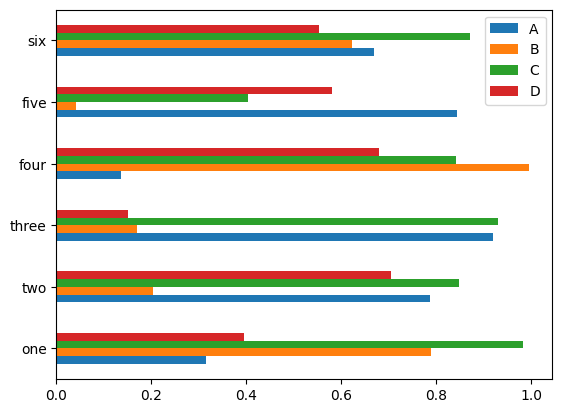

In [38]:
df.plot(kind='barh')

<Axes: >

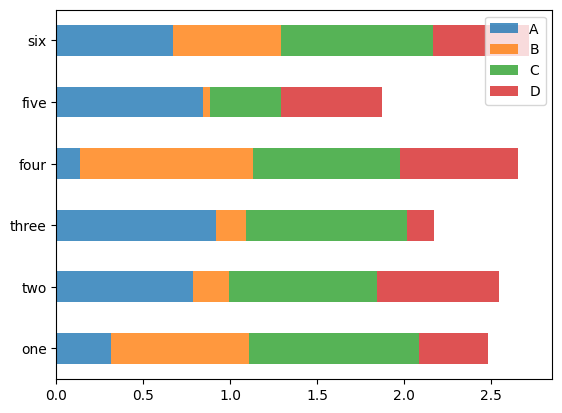

In [39]:
df.plot(kind='barh',stacked=True,alpha=0.8)


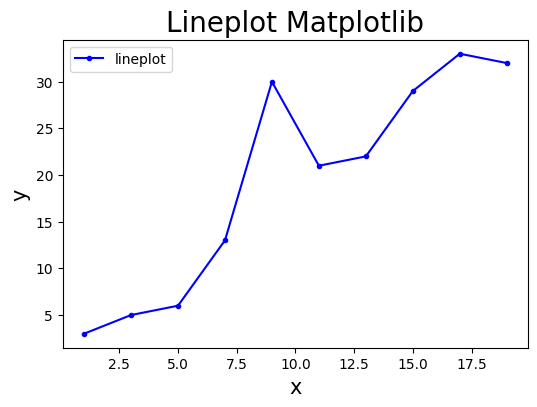

In [40]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(1,21,2)
y = np.array([3,5,6,13,30,21,22,29,33,32])
plt.figure(figsize=(6,4))
plt.plot(x,y,color='blue',marker='o',markersize=3)
plt.title('Lineplot Matplotlib',size = 20)
plt.xlabel('x',size=15)
plt.ylabel('y',size=15)
plt.legend(labels=['lineplot'])

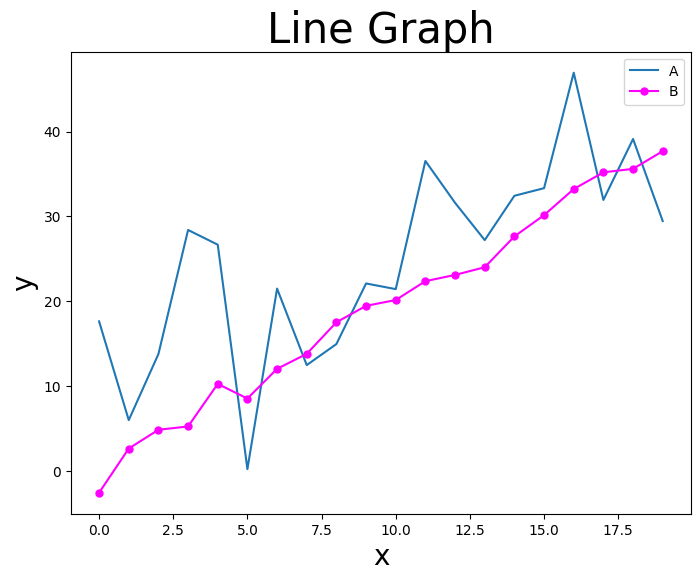

In [41]:
np.random.seed(0)
x = np.arange(20)
y1 = np.arange(20)*2 + np.random.randn(20)*10
# y1 = np.arange(20)*2
y2 = np.arange(20)*2 + np.random.randn(20)
plt.figure(figsize=(8,6))
plt.plot(x,y1)
plt.plot(x,y2,color='magenta',marker='o', markersize=5)
plt.xlabel('x',size=20)
plt.ylabel('y',size=20)
plt.title('Line Graph',size=30)
plt.legend(['A','B'])

range(0, 10)
[8 5 7 6 3 4 6 5 6 8]


Text(0.5, 0, 'x')

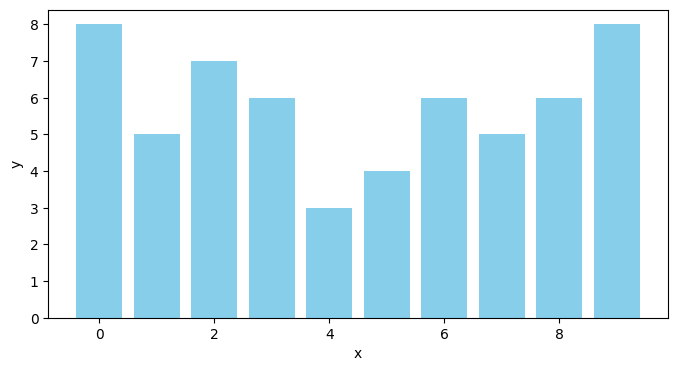

In [42]:
# 과제 - 추가 decoration
# 막대 그래프
y = np.random.randint(2,10,size=10)
x = range(len(y))
print(x)
print(y)
plt.figure(figsize=(8,4))
plt.bar(x,y,width=0.8,color='skyblue')
plt.ylabel('y')
plt.xlabel('x')

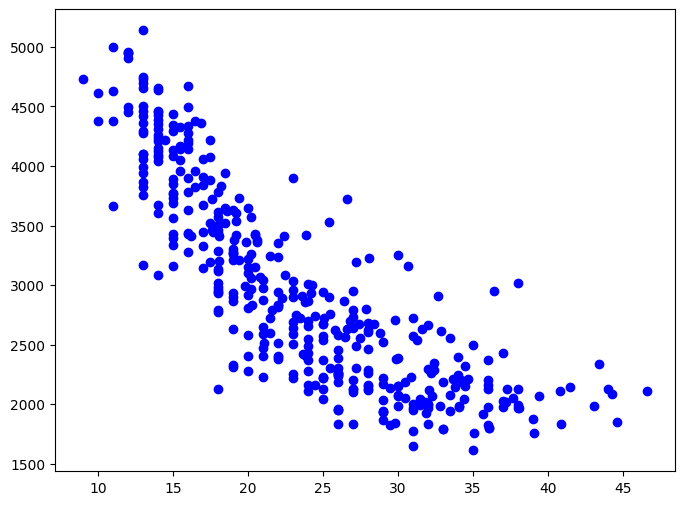

In [44]:
# scatter plot
df_auto = pd.read_excel('/content/drive/MyDrive/kdt_231026/m3_분석라이브러리/visualization/dataset/auto-mpg.xlsx')
x = df_auto.mpg
y = df_auto.weight
plt.figure(figsize=(8,6))
plt.scatter(x,y,color='blue')

(array([ 3., 10., 40., 38., 36., 37., 30., 31., 21., 33., 24., 24., 20.,
        18., 13.,  9.,  4.,  1.,  5.,  1.]),
 array([ 9.  , 10.88, 12.76, 14.64, 16.52, 18.4 , 20.28, 22.16, 24.04,
        25.92, 27.8 , 29.68, 31.56, 33.44, 35.32, 37.2 , 39.08, 40.96,
        42.84, 44.72, 46.6 ]),
 <BarContainer object of 20 artists>)

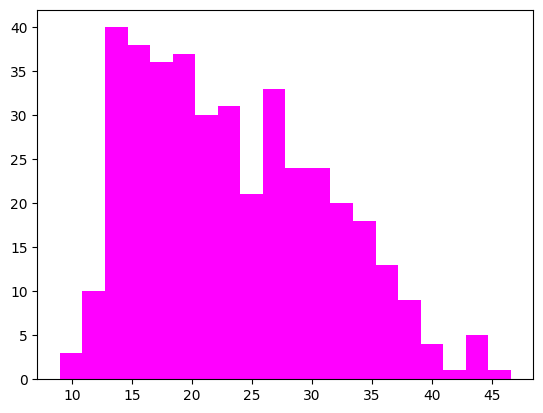

In [45]:
# histogram
plt.hist(df_auto.mpg,bins=20,color='magenta')

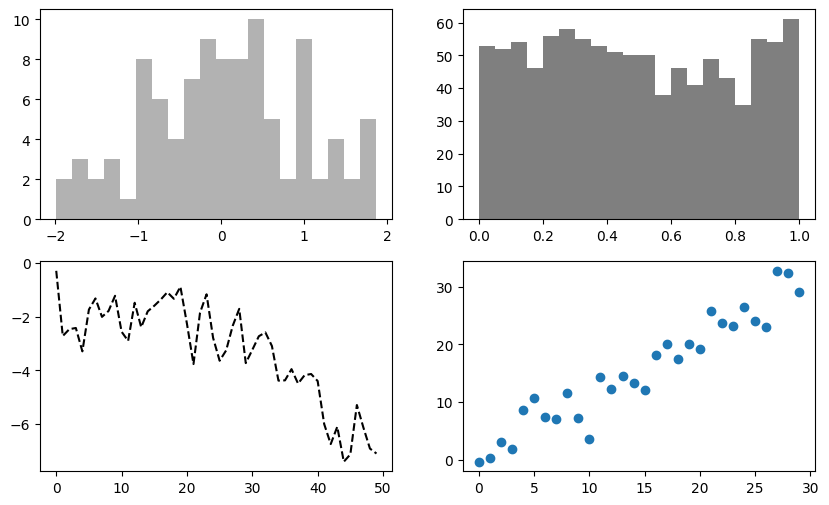

In [46]:
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

x = np.arange(1,21,2)
y = np.array([3,5,6,13,30,21,22,29,33,32])

ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.hist(np.random.rand(1000), bins=20, color='k', alpha=0.5)
ax3.plot(np.random.randn(50).cumsum(),'k--')
# ax3.plot(x,y,'k--')
ax4.scatter(np.arange(30), np.arange(30)+3*np.random.randn(30))

<BarContainer object of 10 artists>

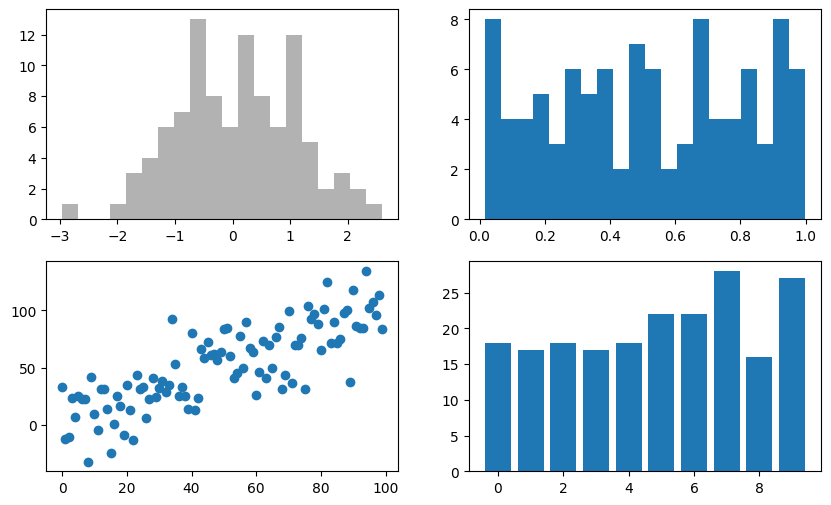

In [47]:
fig = plt.figure(figsize = (10,6))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.hist(np.random.randn(100), bins = 20, color = 'k', alpha = 0.3)
ax2.hist(np.random.rand(100), bins = 20)
ax3.scatter(x = np.arange(100), y = np.arange(100) + np.random.randn(100)*20)
ax4.bar(np.arange(10),np.random.randint(15,30, 10))


In [48]:
# 과제
# Q. 히스토그램, 선, 막대, 산점도 그래프 4개를 서브플롯으로 출력하세요.

(array([2.00000e+00, 5.00000e+00, 2.30000e+01, 4.00000e+01, 9.80000e+01,
        2.43000e+02, 6.45000e+02, 1.41600e+03, 2.96900e+03, 6.08100e+03,
        1.19020e+04, 2.14660e+04, 3.78490e+04, 6.37500e+04, 1.01717e+05,
        1.54457e+05, 2.25616e+05, 3.13230e+05, 4.16141e+05, 5.27325e+05,
        6.37405e+05, 7.35609e+05, 8.12065e+05, 8.53636e+05, 8.57338e+05,
        8.21907e+05, 7.52525e+05, 6.54944e+05, 5.47124e+05, 4.35223e+05,
        3.30097e+05, 2.39433e+05, 1.66749e+05, 1.09792e+05, 6.98430e+04,
        4.12230e+04, 2.38040e+04, 1.31930e+04, 6.86100e+03, 3.38200e+03,
        1.56700e+03, 7.82000e+02, 3.11000e+02, 1.20000e+02, 6.20000e+01,
        2.10000e+01, 7.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([-5.20587565, -4.98975263, -4.77362961, -4.55750659, -4.34138357,
        -4.12526055, -3.90913753, -3.69301451, -3.47689149, -3.26076847,
        -3.04464546, -2.82852244, -2.61239942, -2.3962764 , -2.18015338,
        -1.96403036, -1.74790734, -1.53178432, -1

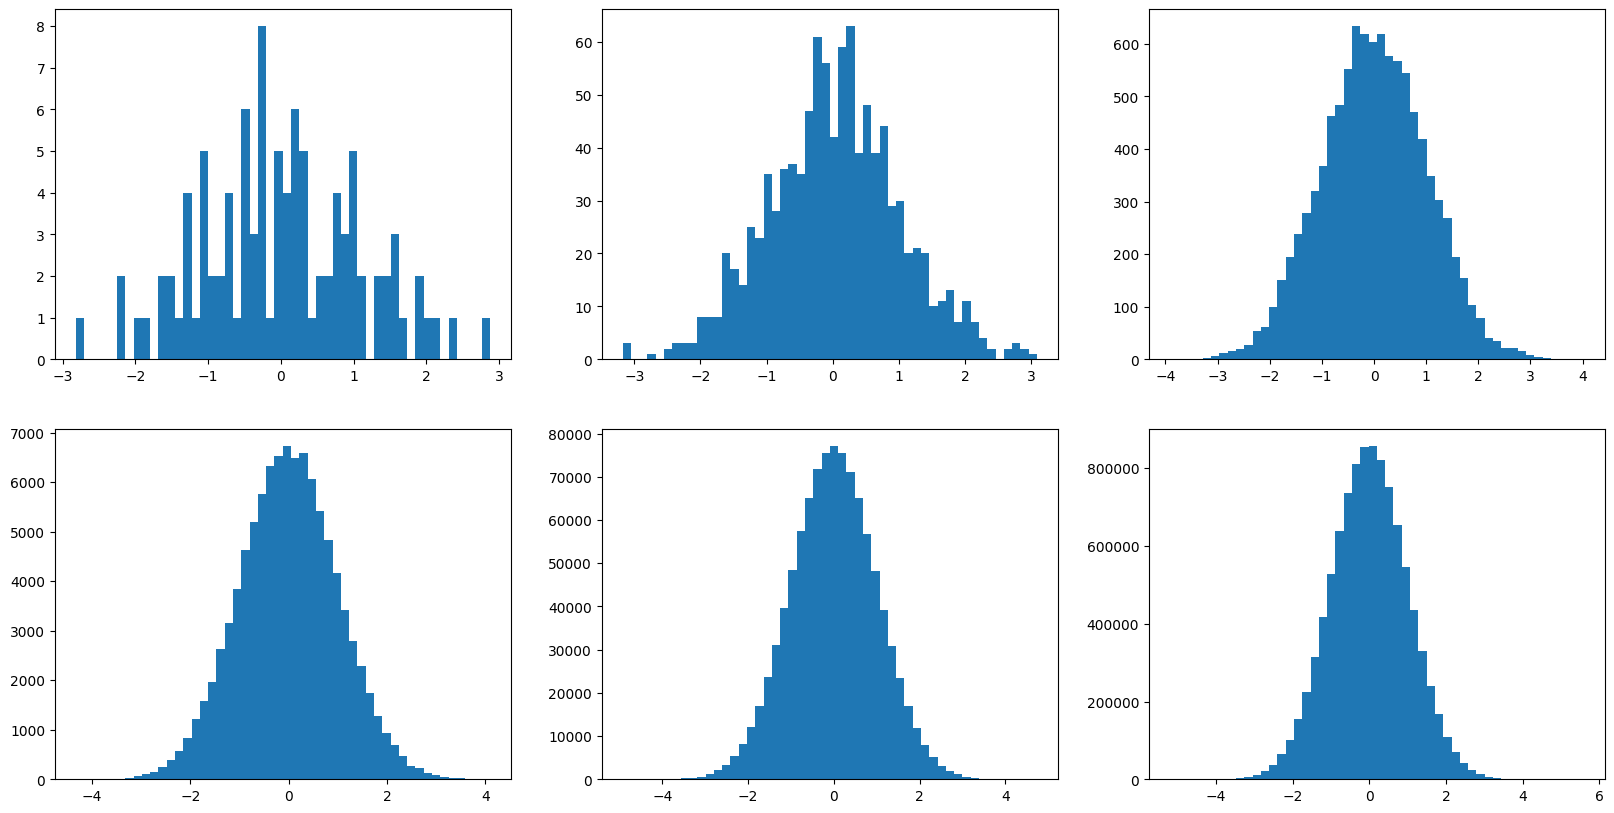

In [49]:
fig,axes = plt.subplots(2,3,figsize=(20,10))
axes[0,0].hist(np.random.randn(100),bins=50)
axes[0,1].hist(np.random.randn(1000),bins=50)
axes[0,2].hist(np.random.randn(10000),bins=50)
axes[1,0].hist(np.random.randn(100000),bins=50)
axes[1,1].hist(np.random.randn(1000000),bins=50)
axes[1,2].hist(np.random.randn(10000000),bins=50)

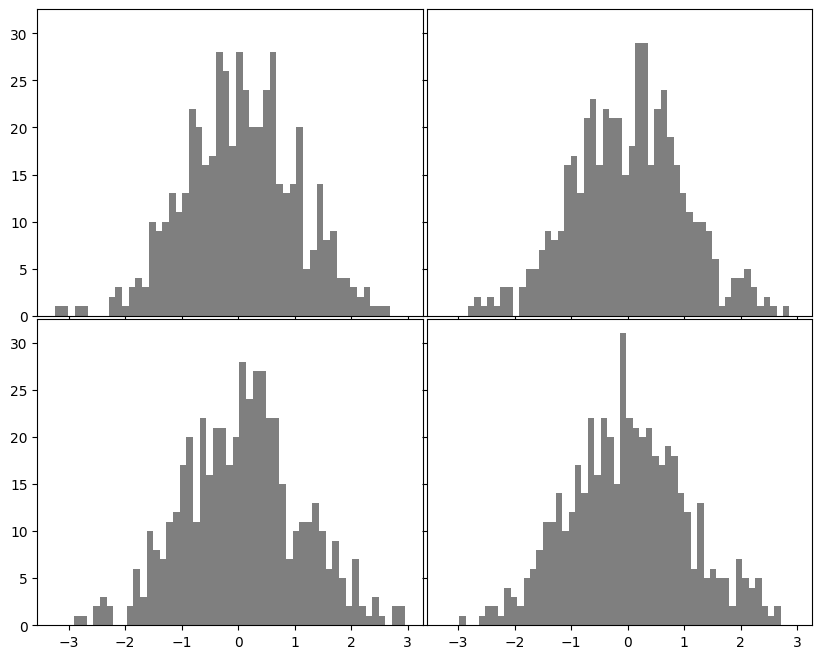

In [50]:
fig,axes = plt.subplots(2,2, figsize=(10,8), sharex=True,sharey=True)
for i in range(2):
    for j in range(2):
        axes[i,j].hist(np.random.randn(500),bins=50, color='k',alpha=0.5)
plt.subplots_adjust(wspace=0.01,hspace=0.01)

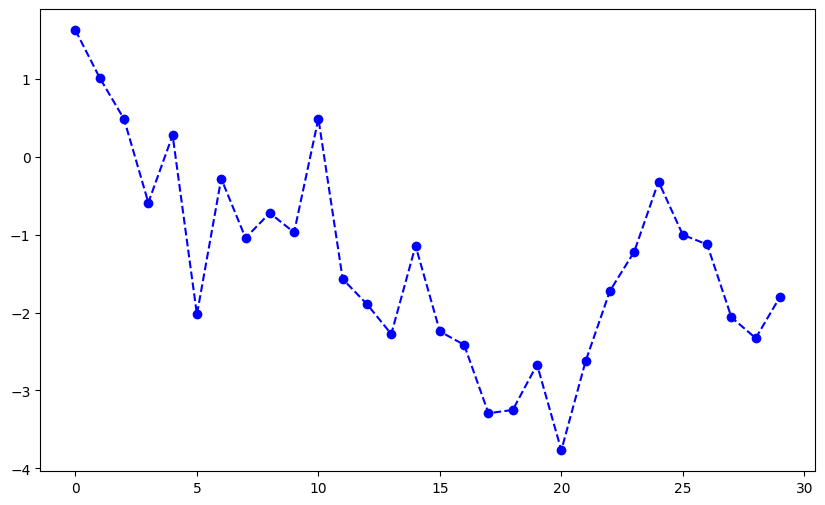

In [51]:
# 색상, 마커, 선 스타일
from numpy.random import randn
np.random.seed(1)
plt.figure(figsize=(10,6))
plt.plot(randn(30).cumsum(),linestyle='dashed', color='b', marker='o')

In [ ]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [3]:
import numpy as np
np.random.seed(0)
data = np.random.randn(1000)
cdata = data.cumsum()
print(data[:10])
cdata[:10]

[ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
  0.95008842 -0.15135721 -0.10321885  0.4105985 ]


array([1.76405235, 2.16420955, 3.14294754, 5.38384074, 7.25139873,
       6.27412085, 7.22420927, 7.07285206, 6.96963321, 7.38023171])

In [54]:
# Google Colab에는 한국어 글꼴이 사전 설치되어 있지 않으므로 수동으로 설치
!sudo apt-get install -y fonts-nanum # 'NanumBarunGothic' 글꼴을 설치
!sudo fc-cache -fv # 글꼴 캐시를 새로 고치고
!rm ~/.cache/matplotlib -rf # Matplotlib 캐시를 지운다.

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (10.6 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121654 files and direc

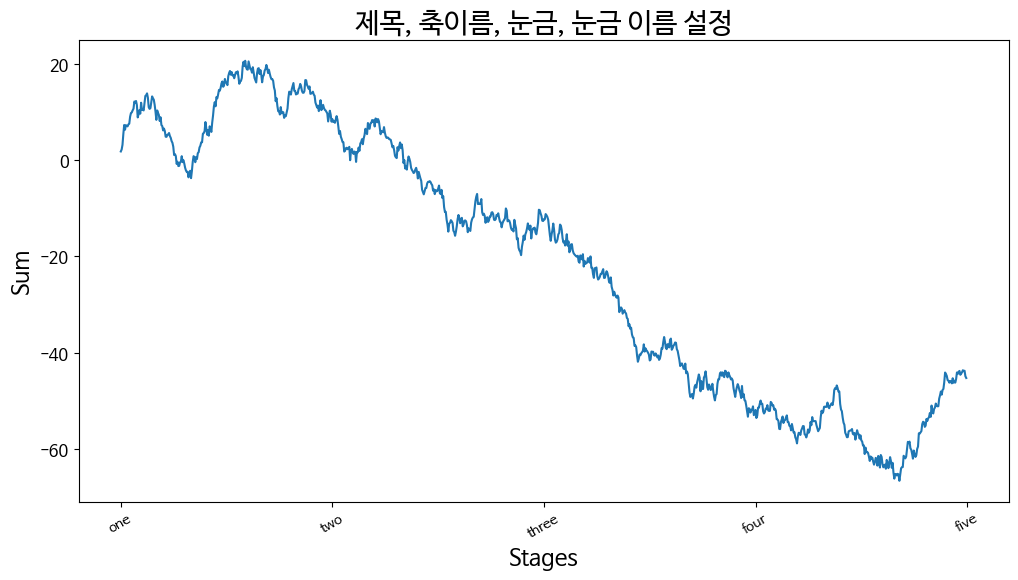

In [8]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
# from matplotlib import rc
# rc('font',family='Malgun Gothic')  # 한글 폰트 설정
plt.rc('font', size=12, family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 출력 설정
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1,1,1)
ax.plot(cdata)
ticks = ax.set_xticks([0,250,500,750,1000])
labels = ax.set_xticklabels(['one','two','three','four','five'],
                           rotation=30,fontsize='small')
ax.set_title('제목, 축이름, 눈금, 눈금 이름 설정',size=20)
ax.set_xlabel('Stages',size=16)
ax.set_ylabel('Sum',size=16)
plt.show()

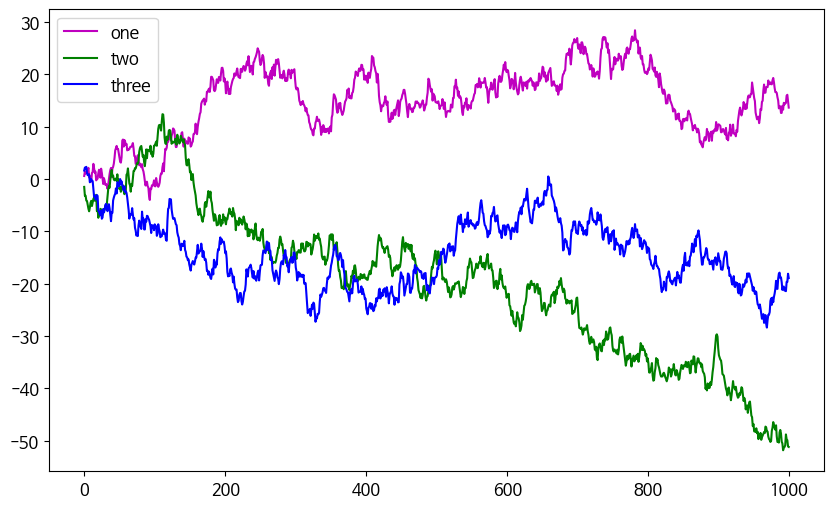

In [9]:
# 범례 추가
from numpy.random import randn
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.plot(randn(1000).cumsum(),'m', label='one')
ax.plot(randn(1000).cumsum(),'g', label='two')
ax.plot(randn(1000).cumsum(),'b', label='three')
plt.legend(loc='best')

In [10]:
import seaborn as sns
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [11]:
def get_age_cat(age):
    cat = ''
    if age < 15: cat = 'young'
    elif age < 30: cat = 'teen'
    elif age < 45: cat = 'adult'
    elif age < 60: cat = 'mature'
    else: cat = 'elder'
    return cat
df['age_cat'] = df['age'].apply(lambda x : get_age_cat(x))
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_cat
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,teen
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,adult
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,teen
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,adult
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,adult


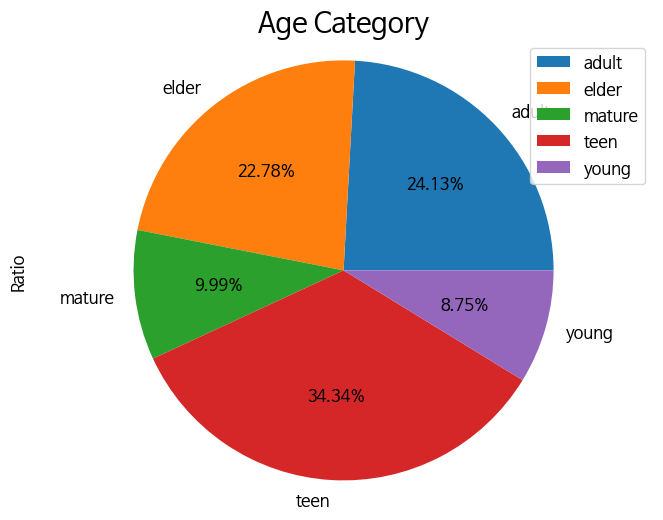

In [12]:
df['Ratio'] = 1
df_age_cat = df.groupby('age_cat').sum()
df_age_cat.Ratio.plot(kind='pie',
                     figsize=(8,6),
                     autopct='%.2f%%',
                     startangle=0)
plt.title('Age Category', size=20)
plt.axis('equal')
plt.legend(labels=df_age_cat.index,loc='best')